# Evaluación 2
Alumna: Analí Burgos Romani

Let's open the maps:

In [1]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))


Now, we are going to subset the map, so we obtain only "Australia"

In [25]:
# let's check some content
countries.head(15)

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
5,Albania,"POLYGON ((20.79192 40.43154, 20.78722 40.39472..."
6,Armenia,"MULTIPOLYGON (((46.54037 38.87559, 46.51639 38..."
7,Andorra,"POLYGON ((1.44583 42.60194, 1.48653 42.65041, ..."
8,Angola,"MULTIPOLYGON (((13.09139 -4.63306, 13.09264 -4..."
9,American Samoa (US),"POLYGON ((-170.74390 -14.37556, -170.74942 -14..."


In [5]:
australia=countries[countries.COUNTRY=='Australia']

Now, we can plot the sub map corresponding to "Australia"

<Axes: >

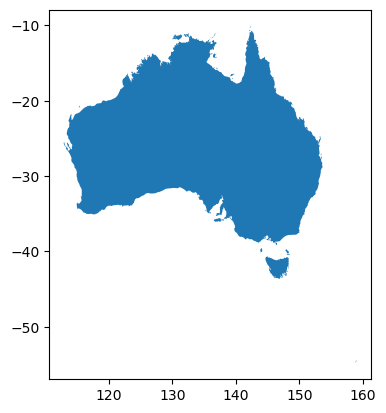

In [6]:
australia.plot()

Now, see details on the cities: 

In [7]:
#Let's check for details on cities
cities.head()

,NAME,COUNTRY,CAPITAL,geometry
0,Murmansk,Russia,N,POINT (33.08604 68.96355)
1,Arkhangelsk,Russia,N,POINT (40.64616 64.52067)
2,Saint Petersburg,Russia,N,POINT (30.45333 59.95189)
3,Magadan,Russia,N,POINT (150.78001 59.57100)
4,Perm',Russia,N,POINT (56.23246 58.00024)


<Axes: >

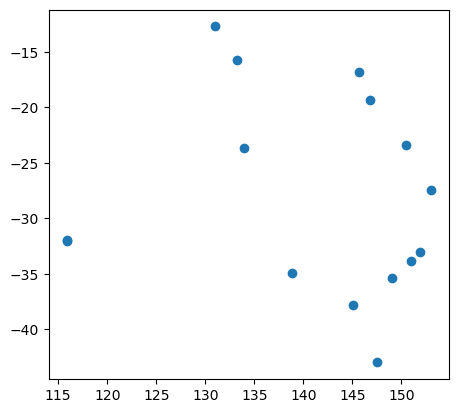

In [9]:
cities_australia=cities[cities.COUNTRY=='Australia']

#we can see the plot of Australia's cities
cities_australia.plot()

Now, let's look at the rivers: 

In [10]:
rivers.head()

,NAME,SYSTEM,geometry
0,Aldan,Lena,"LINESTRING (124.00678 56.47258, 123.25956 56.6..."
1,Amazon,Amazon,"MULTILINESTRING ((-61.27730 -3.60706, -60.6846..."
2,Amu Darya,None,"LINESTRING (73.98818 37.49952, 73.52595 37.528..."
3,Amur,None,"LINESTRING (122.63956 49.99730, 120.47874 49.2..."
4,Angara,None,"LINESTRING (105.07841 51.93053, 103.92959 51.7..."


But for the rivers we are using **clipping**: 

<Axes: >

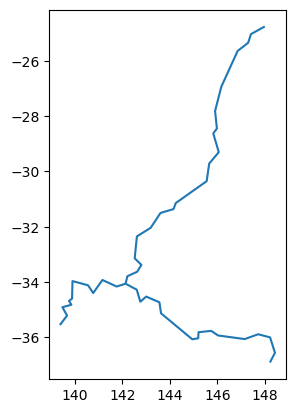

In [11]:
rivers_australia=gpd.clip(gdf=rivers,
                         mask=australia)
#let's see it
rivers_australia.plot()

Now, we can plot the clipped version:

<Axes: >

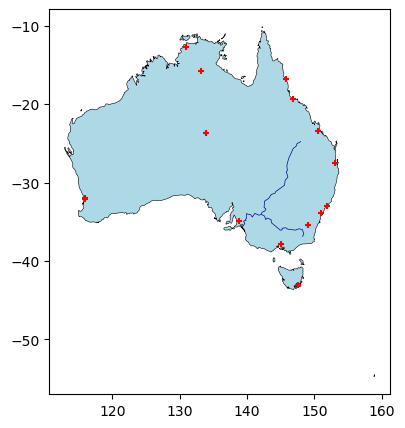

In [22]:
base = australia.plot(facecolor="lightblue", edgecolor='black', linewidth=0.4,figsize=(5,5))
cities_australia.plot(marker='+', color='red', markersize=15,ax=base)
rivers_australia.plot(edgecolor='darkblue', linewidth=0.5,ax=base)

The interactive alterntative for this last case could require the **folium** map to a particular coordinate. Let's fin the one for Australia in: https://www.geodatos.net/en/coordinates:

In [23]:
australiaCoord=[-25.274398, 133.775136]

In [24]:
m = cities_australia.explore(location=australiaCoord,
                   zoom_start=4,
                   tiles='CartoDB positron',
                   color='red',
                   name="cities") #optional
m = rivers_australia.explore(m=m, color="blue",
                   name="rivers")#optional
# folium.LayerControl().add_to(m) #optional
m